# Task 3: Topic modelling and sentiment analysis

##           *Loading necessary packages

In [34]:

import pandas as pd
import string
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from wordcloud import STOPWORDS, WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zefa-n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# *Data acquisition
     use processed data from task1's output

In [35]:
# Read csv into dataframe
tweet_df = pd.read_csv('processed_tweet_data.csv')

In [36]:
len(tweet_df)

6532

# *prepare clean data    

In [37]:
# for the topic modeling and sentiment analysis let's fpcis the text part and polarity 
clean_tweet = tweet_df[['original_text', 'polarity']]

# text Preprocessing
clean_tweet['original_text']=clean_tweet['original_text'].astype(str)
clean_tweet['original_text'] = clean_tweet['original_text'].map(lambda x: x.lower())
clean_tweet['original_text']= \
clean_tweet['original_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


C:\Users\zefa-n\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\zefa-n\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\zefa-n\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [41]:
clean_tweet.head()

,original_text,polarity
0,🚨africa is in the midst of a fullblown third w...,0.166667
1,dr moeti is head of who in africa and one of t...,0.133333
2,thank you research2note for creating this amaz...,0.316667
3,former pfizer vp and virologist dr michael yea...,0.086111
4,i think it’s important that we don’t sell cova...,0.280000


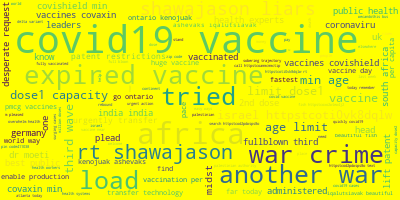

In [43]:
# Join the different processed titles together.
long_string = ','.join(list(clean_tweet['original_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="yellow", max_words=600, contour_width=14, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [44]:
# tokenizing the text and removing stopwords For feature engineering
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) # deacc=True removes punctuations

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = tweet_data.original_text.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['africa', 'midst', 'fullblown', 'third', 'wave', 'coronavirus', 'head', 'whoafro', 'warned', 'cases', 'risen', 'across', 'continent', 'deaths', 'also', 'risen', 'last', 'week', 'jriggers', 'reports']


In [45]:

id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]


# Topic Modeling using Latent Dirichlet Allocation


In [48]:
 
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=15)




In [49]:
pprint(lda_model.print_topics())


[(0,
  '0.036*"vaccines" + 0.028*"covid" + 0.016*"israel" + 0.016*"another" + '
  '0.013*"rt" + 0.012*"amp" + 0.012*"expired" + 0.012*"australia" + '
  '0.011*"load" + 0.011*"dqlw"'),
 (1,
  '0.034*"covid" + 0.024*"vaccines" + 0.021*"risk" + 0.018*"need" + '
  '0.014*"question" + 0.013*"world" + 0.012*"oxygen" + 0.011*"health" + '
  '0.009*"good" + 0.009*"people"'),
 (2,
  '0.025*"covid" + 0.022*"vaccines" + 0.012*"india" + 0.011*"vaccine" + '
  '0.009*"code" + 0.007*"httpstco" + 0.007*"today" + 0.007*"amp" + '
  '0.007*"find" + 0.006*"fully"'),
 (3,
  '0.051*"vaccines" + 0.038*"rt" + 0.037*"israel" + 0.036*"expired" + '
  '0.036*"tried" + 0.036*"another" + 0.035*"crime" + 0.035*"shawajason" + '
  '0.035*"liars" + 0.035*"war"'),
 (4,
  '0.039*"covid" + 0.027*"vaccines" + 0.019*"vaccination" + 0.016*"doses" + '
  '0.016*"amp" + 0.010*"need" + 0.009*"ontario" + 0.009*"africa" + '
  '0.008*"vaccine" + 0.008*"go"'),
 (5,
  '0.042*"covid" + 0.023*"vaccines" + 0.013*"world" + 0.012*"people" 

### LDA Model Analysis Perplexity and Coherence Score
  The lower the Perplexity, the better the model for the given data.

In [51]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -6.870869104964042

 Ldamodel Coherence Score/Accuracy on Tweets:  0.3584218845904768
